In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from textwrap import wrap
plt.style.use('style/unhcrpyplotstyle.mplstyle')

#########

#load data set
df = pd.read_csv('data/bar_stacked.csv')

#reshape df from long to wide
df = df.pivot(index='country_origin', columns='population_type', values='population_number')
df = df.reset_index()

#sort by total descending order
df['Total'] = df.sum(numeric_only=True, axis=1)
df = df.sort_values("Total", ascending=True)
df= df.fillna(0)

#prepare data array for plotting
x = df['country_origin']
y1 = df['VDA']
y2 = df['REF']
y3 = df['ASY']
b_y3 = np.add(y1, y2)

#wrap long labels
x = [ '\n'.join(wrap(l, 20)) for l in x ]

#plot the chart
fig, ax = plt.subplots()
rect1=ax.barh(x, y1, label='Venezuelans dispalced abrod')
rect2=ax.barh(x, y2, left=y1, label='Refugees')
rect3=ax.barh(x, y3, left=b_y3, label='Asylum-seekers')

#set chart title
ax.set_title('People displaced across borders by country of origin | 2021')

#set chart legend
ax.legend(loc=(0,1.02), ncol=3)

#set y-axis title
ax.set_xlabel('Number of people (millions)')

#set tick parameters 
ax.tick_params(labelbottom=True,labelleft=True)

#set x-axis tick and label
ax.set_yticks(x)

#remove unnecessary spines 
ax.spines['bottom'].set_visible(False)

#show grid below the bars
ax.grid(axis='x')
ax.set_axisbelow(True)

#format x-axis tick labels
def number_formatter(x, pos):
    if x >= 1e6:
        s = '{:1.0f}M'.format(x*1e-6)
    elif x < 1e6 and x >= 1e3:
        s = '{:1.0f}K'.format(x*1e-3)
    else: 
        s = '{:1.0f}'.format(x)
    return s
ax.xaxis.set_major_formatter(number_formatter)

#set chart source and copyright
plt.annotate('Source: UNHCR Refugee Data Finder', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
plt.annotate('©UNHCR, The UN Refugee Agency', (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)

#########

#save charts
plt.savefig('example/name.png')

#show charts
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'data/bar_stacked.csv'

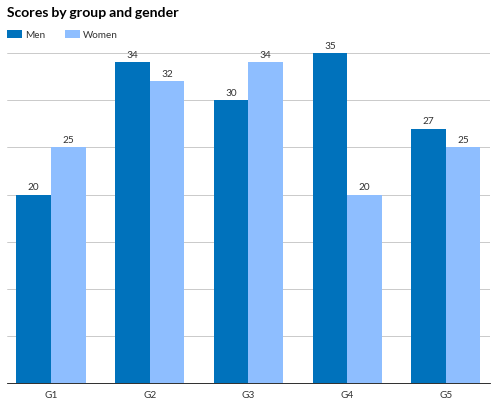

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('unhcr_stylesheet.mplstyle')

labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend(loc=(0,1.02), ncol=3)

ax.tick_params(labelleft=False)
ax.spines['left'].set_visible(False)
ax.grid(axis='y')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

#save charts
plt.savefig('figure/name.png', dpi=300, facecolor="w")

plt.show()

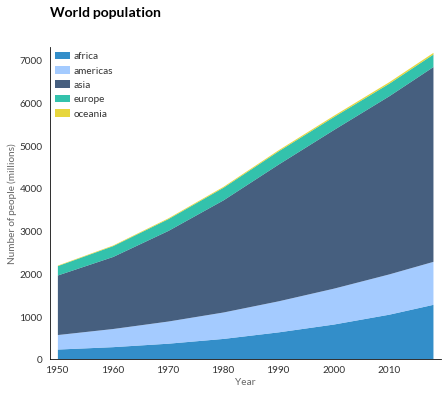

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('unhcr_stylesheet.mplstyle')

# data from United Nations World Population Prospects (Revision 2019)
# https://population.un.org/wpp/, license: CC BY 3.0 IGO
year = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
population_by_continent = {
    'africa': [228, 284, 365, 477, 631, 814, 1044, 1275],
    'americas': [340, 425, 519, 619, 727, 840, 943, 1006],
    'asia': [1394, 1686, 2120, 2625, 3202, 3714, 4169, 4560],
    'europe': [220, 253, 276, 295, 310, 303, 294, 293],
    'oceania': [12, 15, 19, 22, 26, 31, 36, 39],
}

fig, ax = plt.subplots()
ax.stackplot(year, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=0.8)
ax.legend(loc='upper left')
ax.set_title('World population')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people (millions)')

plt.show()

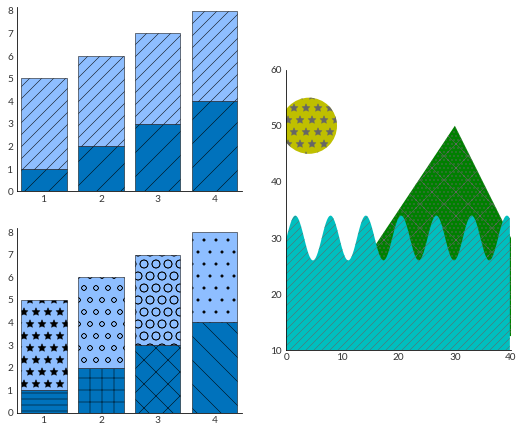

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
plt.style.use('unhcr_stylesheet.mplstyle')

x = np.arange(1, 5)
y1 = np.arange(1, 5)
y2 = np.ones(y1.shape) * 4

fig = plt.figure()
axs = fig.subplot_mosaic([['bar1', 'patches'], ['bar2', 'patches']])

axs['bar1'].bar(x, y1, edgecolor='black', hatch="/")
axs['bar1'].bar(x, y2, bottom=y1, edgecolor='black', hatch='//')

axs['bar2'].bar(x, y1, edgecolor='black', hatch=['--', '+', 'x', '\\'])
axs['bar2'].bar(x, y2, bottom=y1, edgecolor='black',
                hatch=['*', 'o', 'O', '.'])

x = np.arange(0, 40, 0.2)
axs['patches'].fill_between(x, np.sin(x) * 4 + 30, y2=0,
                            hatch='///', zorder=2, fc='c')
axs['patches'].add_patch(Ellipse((4, 50), 10, 10, fill=True,
                                 hatch='*', facecolor='y'))
axs['patches'].add_patch(Polygon([(10, 20), (30, 50), (50, 10)],
                                 hatch='\\/...', facecolor='g'))
axs['patches'].set_xlim([0, 40])
axs['patches'].set_ylim([10, 60])
axs['patches'].set_aspect(1)
plt.show()

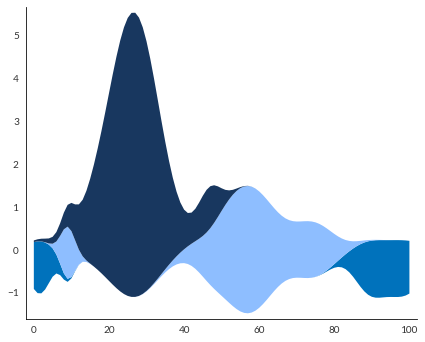

In [18]:
# Fixing random state for reproducibility
np.random.seed(19680801)


def gaussian_mixture(x, n=5):
    """Return a random mixture of *n* Gaussians, evaluated at positions *x*."""
    def add_random_gaussian(a):
        amplitude = 1 / (.1 + np.random.random())
        dx = x[-1] - x[0]
        x0 = (2 * np.random.random() - .5) * dx
        z = 10 / (.1 + np.random.random()) / dx
        a += amplitude * np.exp(-(z * (x - x0))**2)
    a = np.zeros_like(x)
    for j in range(n):
        add_random_gaussian(a)
    return a


x = np.linspace(0, 100, 101)
ys = [gaussian_mixture(x) for _ in range(3)]

fig, ax = plt.subplots()
ax.stackplot(x, ys, baseline='wiggle')
plt.show()

Text(0.5, 0.98, 'Categorical Plotting')

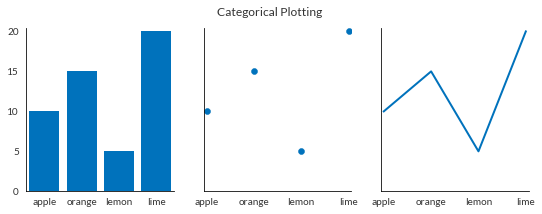

In [18]:
import matplotlib.pyplot as plt

data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')